In [58]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Distribution functions

Let’s now see how code can help us when working with distributions, beginning with the probability mass function. As an example, let’s take a look at the binomial distribution. This is defined as:
 with Say we have a process with a 30% chance of success;  tells us how likely it is to get  successes out of  independent trials.

$$ P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k} $$
where:
- P(X = k) represents the probability of having exactly k successes in n independent trials.
- C(n, k) is the binomial coefficient, also known as "n choose k," which represents the number of ways to choose k successes from n trials.
- p is the probability of success in a single trial.
- (1-p) is the probability of failure in a single trial.


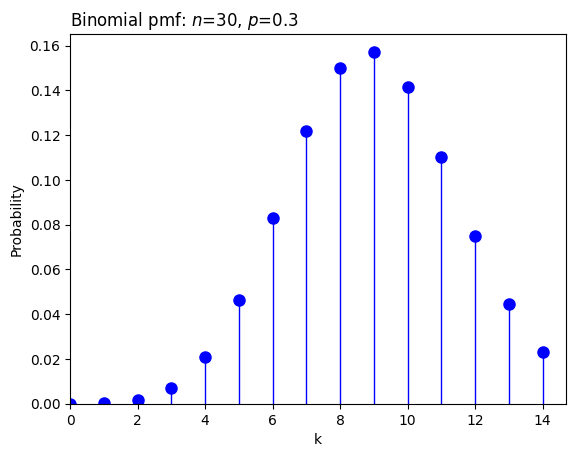

In [59]:
n = 30
p = 0.3
rv = st.binom(n, p)
k = np.arange(0, 15)

## Plot
fig, ax = plt.subplots()
ax.plot(k, rv.pmf(k), "bo", ms=8)  ## Plota os pontos (k, P(X=k)) com círculos azuis
ax.vlines(k, 0, rv.pmf(k), colors="b", linestyles="-", lw=1)  ## Plota linhas verticais nos pontos (k, P(X=k))
ax.set_title(f"Binomial pmf: $n$={n}, $p$={p}", loc="left")  ## Define o título do gráfico
ax.set_xlabel("k")  ## Define o rótulo do eixo x
ax.set_ylabel("Probability")  ## Define o rótulo do eixo y
ax.set_xlim(0, None)  ## Define os limites do eixo x
ax.set_ylim(0, None)  ## Define os limites do eixo y
plt.show()  ## Exibe o gráfico

A função de distribuição acumulada (CDF) da distribuição binomial é dada pela fórmula:

$
F(k;n,p) = P(X \leq k) = \sum_{i=0}^{k} \binom{n}{i} \cdot p^i \cdot (1-p)^{n-i}
$

Onde:
- $F(k;n,p)$ é a função de distribuição acumulada da distribuição binomial.
- $P(X \leq k)$ é a probabilidade de obter no máximo k sucessos.
- $\binom{n}{i}$ é o coeficiente binomial, que representa o número de combinações de n elementos tomados i de cada vez.
- $p$ é a probabilidade de sucesso em cada tentativa.
- $n$ é o número total de tentativas independentes.
- $i$ é o número de sucessos desejado.

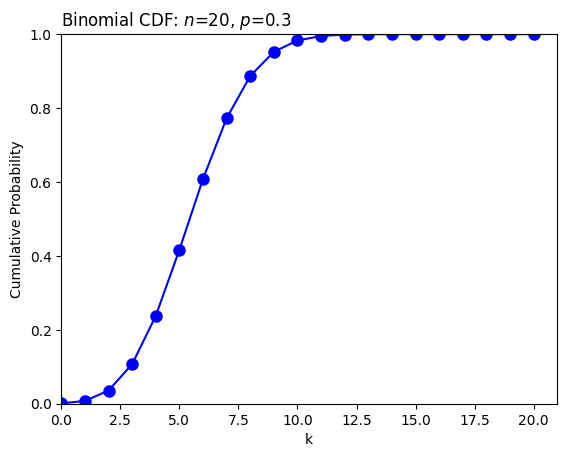

In [60]:
n = 20
p = 0.3
rv = st.binom(n, p)
k = np.arange(0, n+1)

## Calculate cumulative distribution function (CDF)
cdf = rv.cdf(k)

## Plot
fig, ax = plt.subplots()
ax.plot(k, cdf, "bo-", ms=8)                        ## Plota a CDF como pontos conectados por linhas
ax.set_title(f"Binomial CDF: $n$={n}, $p$={p}", loc="left")     ## Define o título do gráfico
ax.set_xlabel("k")                          ## Define o rótulo do eixo x
ax.set_ylabel("Cumulative Probability")     ## Define o rótulo do eixo y
ax.set_xlim(0, None)                      ## Define os limites do eixo x
ax.set_ylim(0, 1)                         ## Define os limites do eixo y entre 0 e 1
plt.show()                                ## Exibe o gráfico

# Random numbers drawn from distributions

Gerando números aleatórios de uma binomial. 

In [61]:
import numpy as np

n = 10  # número de tentativas
p = 0.5  # probabilidade de sucesso

# Gerar números aleatórios seguindo a distribuição binomial
random_numbers = np.random.binomial(n, p, size=3)

print(random_numbers)

[3 6 4]


# Gerando uma distribuição normal com média zero e desvio padrão 1. Isto é: x ~ N(0,1)

No gráfico, a "normal analítica" refere-se à função de distribuição de probabilidade teórica da distribuição normal padrão (também conhecida como distribuição Gaussiana). É calculada utilizando a função gauss(x) definida no código. A função gauss(x) retorna os valores da distribuição normal padrão para uma faixa de valores de x, seguindo a fórmula matemática da distribuição normal.

Por outro lado, a "normal generated" refere-se aos valores aleatórios gerados a partir da distribuição normal padrão utilizando a função np.random.standard_normal(). Esses valores são amostras aleatórias que seguem a distribuição normal padrão, mas não correspondem exatamente à distribuição teórica.

Ao plotar o gráfico, a linha azul representa a distribuição teórica (normal analítica), mostrando como os valores da distribuição normal padrão se distribuem em relação aos diferentes valores de x. As barras azuis representam o histograma dos valores gerados aleatoriamente (normal generated) a partir da distribuição normal padrão. O histograma é uma representação gráfica da distribuição dos valores amostrados, mostrando a frequência de ocorrência dos valores em diferentes intervalos.

Através da comparação entre a normal analítica e a normal gerada no gráfico, é possível observar se as amostras aleatórias seguem aproximadamente a distribuição teórica esperada. Quanto mais próximo o histograma estiver da linha teórica, mais próxima é a correspondência entre os valores gerados e a distribuição teórica. Isso permite verificar a validade da geração de números aleatórios com base na distribuição normal padrão.

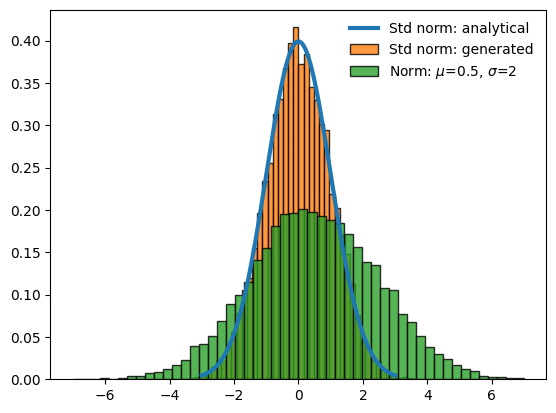

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def gauss(x):
    """Analytical Gaussian."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

# Make the random draws
num_draws = 10000
vals = np.random.standard_normal(num_draws)

# Get analytical solution
x_axis_vals = np.linspace(-3, 3, 300)
analytic_y = gauss(x_axis_vals)

# Random draws of shifted/flatter dist
mu = 0.5
sigma = 2
vals_shift = np.random.normal(loc=mu, scale=sigma, size=num_draws)

fig, ax = plt.subplots()
ax.plot(x_axis_vals, analytic_y, label="Std norm: analytical", lw=3)
ax.hist(vals, bins=50, range=(-4, 4), label="Std norm: generated", density=True, alpha=0.8, edgecolor='black')
ax.hist(
    vals_shift,
    bins=50,
    range=(-7, 7),
    label=f"Norm: $\mu$={mu}, $\sigma$={sigma}",
    density=True,
    alpha=0.8,
    edgecolor='black'
)
ax.legend(frameon=False)
plt.show()

